In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from scipy.linalg import dft
from scipy import integrate
import scipy

# (1)

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


DTFS Coffeicients are:
 [0.25  0.226 0.162 0.078 0.    0.05  0.062 0.04  0.    0.036 0.05  0.036
 0.    0.04  0.062 0.05  0.    0.078 0.162 0.226]


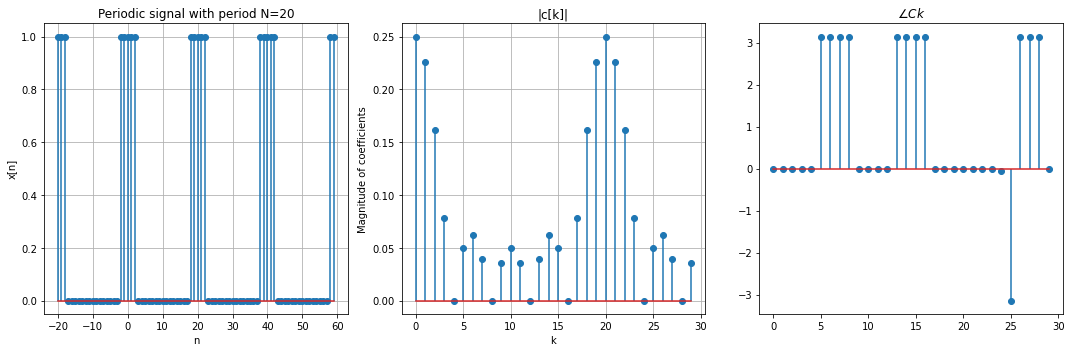

In [21]:
x=np.zeros(80,dtype=complex)
n=np.arange(-20,60)
#Periodic signal with  period N=20
for i in range(-10,70):
    if i%20<=2 or i%20>=18:
        x[i]=1

plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title('Periodic signal with period N=20')
plt.stem(n,x,use_line_collection=True)
plt.grid(True)

# DTFS Coefficients of periodic signal
c=np.zeros(30,dtype=complex)
#DTFS of Periodic signal
for k in range(30):
    for n in range(-10,10):
        c[k]+=(1/20)*x[n]*np.exp(-(1j*k*n*2*np.pi)/20)
print('DTFS Coffeicients are:\n',abs(np.round(c[0:20],3)))
plt.subplot(1,3,2)
plt.xlabel("k")
plt.ylabel("Magnitude of coefficients")           
plt.title('|c[k]|')
plt.stem(abs(c))                                     #Magnitude of coefficients
plt.grid(True)

plt.subplot(1,3,3)
plt.title(r'$\angle Ck $')
plt.stem(np.angle(c))                               #angle of coefficients
plt.tight_layout()

# (2)

# (a)

<ipython-input-22-c3caed524153>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  x_1[i] += c_1[k]*np.exp(1j*k*(2*(np.pi)/20)*i)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


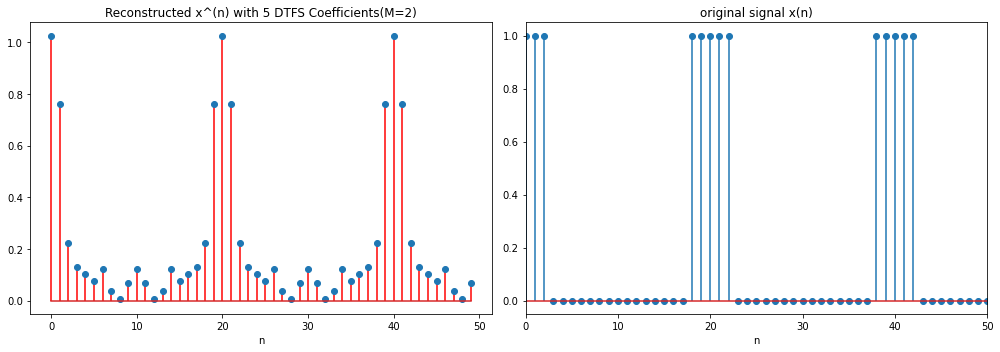

In [22]:
c_1=[c[2],c[1],c[0],c[1],c[2]]         #First 5 DTFS Coefficients
c_1=np.round(np.abs(c_1),3)
x_1=np.zeros(50)
n_1=np.arange(50)
#Reconstruction of signal using coefficients
for i in n_1:
    for k in range(len(c_1)):
        x_1[i] += c_1[k]*np.exp(1j*k*(2*(np.pi)/20)*i)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Reconstructed x^(n) with 5 DTFS Coefficients(M=2)')
plt.xlabel('n')
plt.stem(n_1,np.abs(x_1),'r')                                      # Plot Reconstructed Signal
plt.subplot(1,2,2)
plt.title('original signal x(n)')
plt.xlabel('n')
plt.xlim(0,50)
plt.stem(x,use_line_collection=True)                                # Plot Original signal
plt.tight_layout()

# (b)

<ipython-input-23-b7da02d820a0>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  x_2[i] += c_2[k]*np.exp(1j*k*(2*(np.pi)/20)*i)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


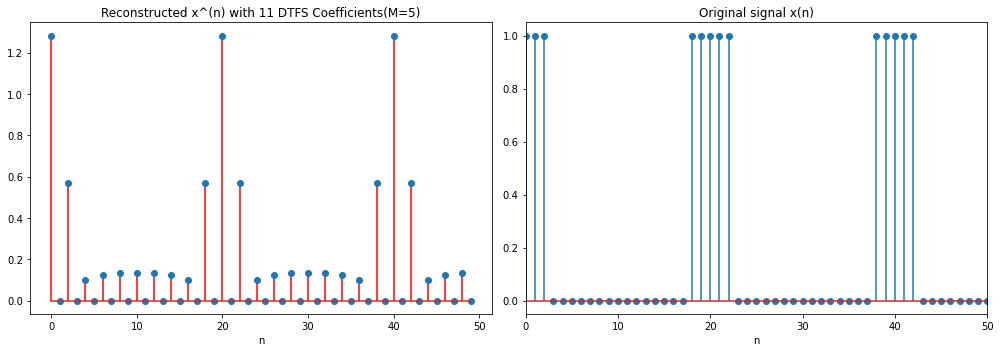

In [23]:
c_2=[c[5],c[4],c[3],c[2],c[1],c[0],c[1],c[2],c[3],c[4],c[5]]      #First 11 DTFS Coefficients
c_2=np.round(np.abs(c_2),3)
x_2=np.zeros(50)
n_2=np.arange(50)
#Reconstruction  of signal using coefficients
for i in n_2:
    for k in range(len(c_2)):
        x_2[i] += c_2[k]*np.exp(1j*k*(2*(np.pi)/20)*i)
        
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Reconstructed x^(n) with 11 DTFS Coefficients(M=5)')
plt.xlabel('n')
plt.stem(n_2,abs(x_2),'r')                                       #Plot Reconstructed sequence
plt.subplot(1,2,2)
plt.title('Original signal x(n)')
plt.xlabel('n')
plt.stem(x,use_line_collection=True)                            #Plot Original Sequence
plt.xlim(0,50)
plt.tight_layout()

As we increase the number of coefficients to reconstruct the signal,the reconstructed signal will be approximately equal
to the original signal.

# (3)

# (a)

<StemContainer object of 3 artists>

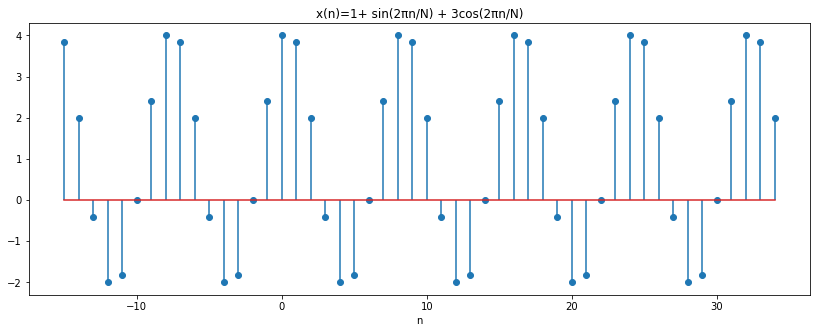

In [17]:
n=np.arange(-15,35)
N=8
def x(n):
    return 1+np.sin(2*np.pi*n/N)+3*np.cos(2*np.pi*n/N)
plt.figure(figsize=(14,5))
plt.title('x(n)=1+ sin(2πn/N) + 3cos(2πn/N)')
plt.xlabel('n')
plt.stem(n,x(n))

DTFS Coffeicients are:
 [3.         4.74341649 0.         0.         0.         0.
 0.         4.74341649]


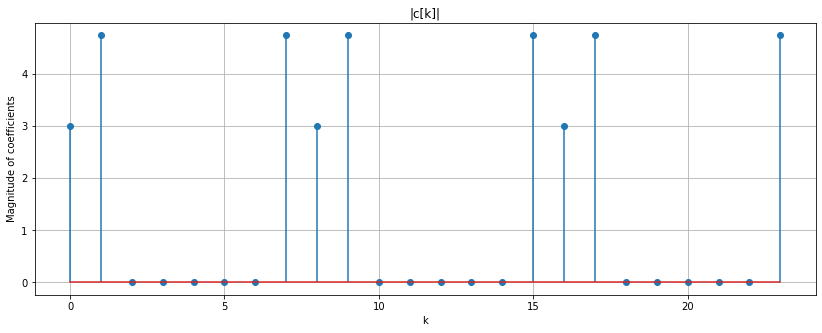

In [18]:
#DTFS cofficients 
c=np.zeros(24,dtype=complex)

#Calculation of DTFS of the signal
for k in range(len(c)):
    for n in range(len(c)):
        c[k]+=(1/N)*(x(n)*np.exp(-(1j*k*n*2*np.pi)/N))
print('DTFS Coffeicients are:\n',abs(np.round(c[0:8],3)))
plt.figure(figsize=(14,5))
plt.xlabel("k")
plt.ylabel("Magnitude of coefficients")
plt.title('|c[k]|')
plt.stem(abs(c))                                        #plot magnitude of DTFS Coefficients
plt.grid(True)

# (4)

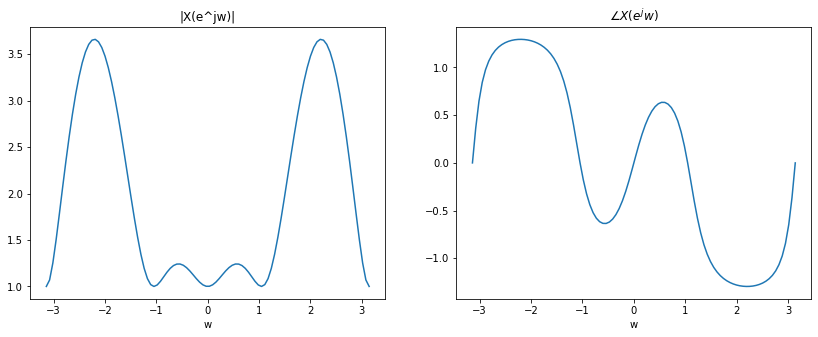

In [19]:
n=np.arange(-5,6)
#Construct the signal
def x_3(n):
    x=[]
    for i in range(0,len(n)):
        if (0<=n[i]<=1) or (n[i]==-2):
            x.append(1)
        elif (n[i]==2) or (n[i]==-1):
            x.append(-1)
        else:
            x.append(0)
    return x

#function to compute DTFT 
def X_3(LL,UL,w):
    result = 0
    for i in range(LL,UL,1):
        result+=(x_3(n)[i+5]*(np.exp(-1j*w*i)))
    return result

fig,axes=plt.subplots(1,2,figsize=(14,5))
w=np.linspace(-np.pi,np.pi,100)

axes[0].set_title('|X(e^jw)|')
axes[0].set_xlabel('w')
axes[0].plot(w,abs(X_3(-5,5,w)))               #Magnitude plot

axes[1].set_title(r'$ \angle X(e^jw)$')
axes[1].set_xlabel('w')
axes[1].plot(w,np.angle(X_3(-5,5,w)))          #Phase plot

# (5)

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


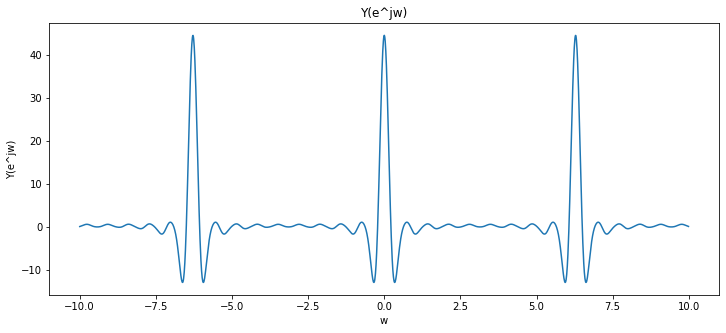

In [67]:
def x_n(a,n):                           #input signal
    return a**n *(n>=0)
def u_n(n):                             #impulse response
    return 1*(n>=0)
def x_w(a,LL,UL,w):                     #DTFT of input Signal
    dtft = 0
    for i in range(LL,UL,1):
        dtft+=(x_n(a,i)*(np.exp(-1j*w*i)))
    return dtft

def u_w(LL,UL,w):                        #DTFT of impulse response
    dtft = 0
    for i in range(LL,UL,1):
        dtft+=(u_n(i)*(np.exp(-1j*w*i)))
    return dtft

w=np.arange(-10,10,0.01)
X_w=x_w(0.8,-10,10,w)

U_w=u_w(-10,10,w)
Y_w=np.multiply(X_w,U_w)             #DTFT of output
plt.figure(figsize=(12,5))
plt.title('Y(e^jw)')
plt.xlabel(r'w')
plt.ylabel('Y(e^jw)')
plt.plot(w,(Y_w))                            #plot DTFT Of output

<StemContainer object of 3 artists>

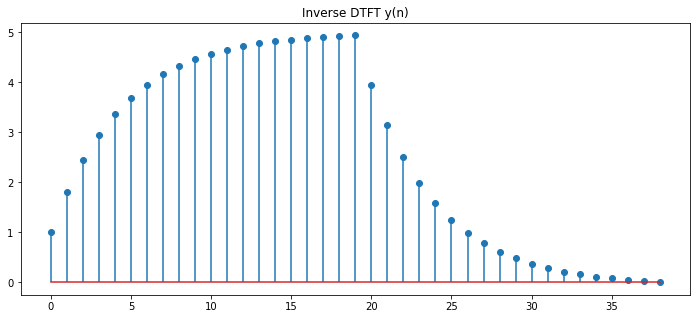

In [66]:
n=np.arange(0,20)
y_n=np.convolve(x_n(0.8,n),u_n(n))              #inverse DTFT
n_1=np.arange(-20,19)
plt.figure(figsize=(12,5))
plt.title('Inverse DTFT y(n)')                 
plt.stem(y_n)

# (6)

# (a)

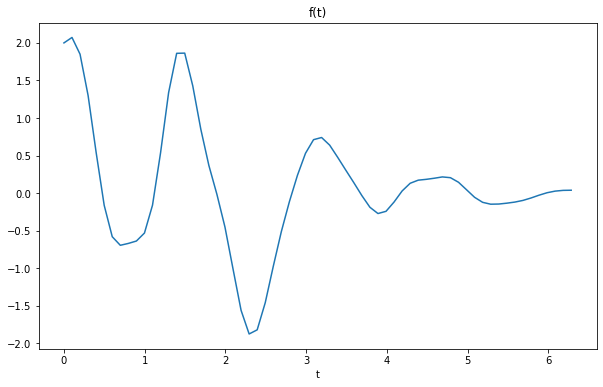

In [30]:
t=np.linspace(0,2*np.pi,64)
f=np.exp(-(t**2)/10)*(np.sin(2*t)+2*np.cos(4*t)+0.4*(np.sin(t)*np.sin(10*t)))
plt.figure(figsize=(10,6))
plt.title('f(t)')
plt.xlabel('t')
plt.plot(t,f)                        #plot the signal

# (b)

<StemContainer object of 3 artists>

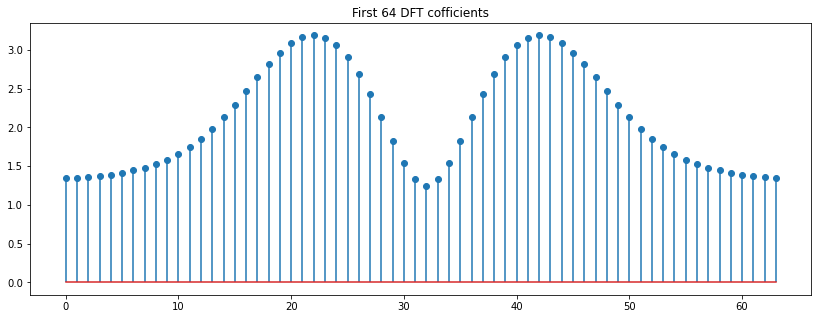

In [27]:
t_1=np.arange(0,64)
f_1=f=np.exp(-(t_1**2)/10)*(np.sin(2*t_1)+2*np.cos(4*t_1)+0.4*(np.sin(t_1)*np.sin(10*t_1)))
f_1=np.reshape(f_1,(64,1))
dftm=dft(64)                                         #DFT transformation matrix 
Y=dftm.dot(f_1)                                      # Calculate DFT coefficients 
plt.figure(figsize=(14,5))
plt.title('First 64 DFT cofficients')
plt.stem(t_1,abs(Y))                                 #plot the Coefficients

# (7)

# (a)

<StemContainer object of 3 artists>

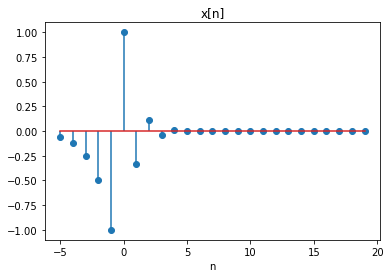

In [68]:
n=np.arange(-5,20)
def h_1(n):
    return (-1/3)**n *(n>=0)
def h_2(n):
    return (1/2)**n *(n>=0)
def h(n):                         #input signal
    return h_1(n)-h_2(-n-1)
plt.title('x[n]')
plt.xlabel('n')
plt.stem(n,h(n))                   #plot input signal

# X(Z)=1/(1+0.3z^-1)+1/(1-2z^-1)  Roc:1/3<|z|<1/2
# X(z)= (12z^2-z)/(6z^2-z-1)

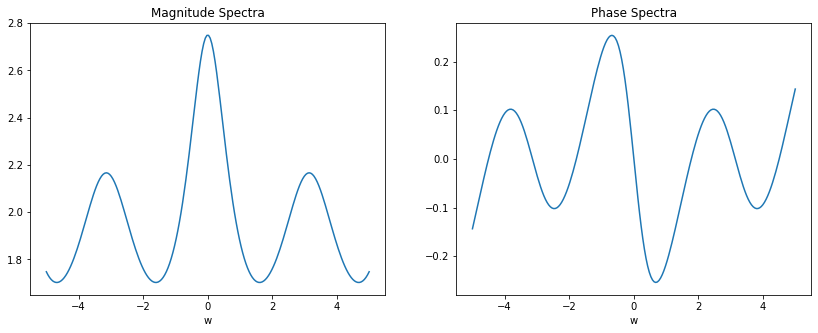

In [33]:
w=np.linspace(-5,5,200)

#Z transform X(z)= 1/(1+0.3z^-1)+1/(1-2z^-1)

H_z=1/(1+((1/3)*np.exp(-1j*w)))+(1/(1-0.5*np.exp(-1j*w)))          
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Magnitude Spectra')
plt.xlabel('w')
plt.plot(w,abs(H_z))                    #Magnitude plot

plt.subplot(1,2,2)
plt.title('Phase Spectra')
plt.xlabel('w')
plt.plot(w,np.angle(H_z))                #Phase plot


# (b)

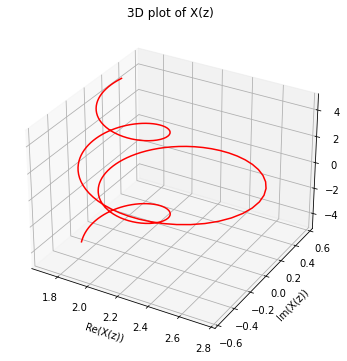

In [34]:
fig=plt.figure(figsize=(10,6))
ax=plt.axes(projection='3d')
x=np.real(H_z)
y=np.imag(H_z)
ax.set_title('3D plot of X(z)')
ax.set_xlabel('Re(X(z))')
ax.set_ylabel('Im(X(z))')
ax.plot3D(x,y,w,'r')                     #plot the real and imaginary part on z-plane

# ROC: 1/3<|z|<1/2 

# X(z)= 12z^2-z/6z^2-z-1

In [36]:
from scipy import signal

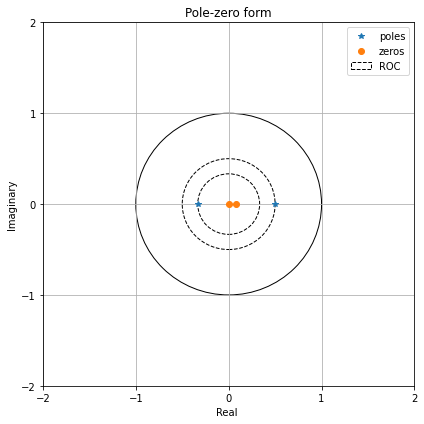

In [40]:
num_1=[12,-1,0]
den_1=[6, -1,  -1]
z,p,k=scipy.signal.tf2zpk(num_1,den_1)                #determine the pole and zero locations and gain k

Circle=plt.Circle((0,0),1,fill=False)

#for ROC
Circle_1=plt.Circle((0,0),1/2,linestyle='--',fill=False,label='ROC')      
Circle_2=plt.Circle((0,0),1/3,linestyle='--',fill=False)
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(p.real,p.imag,'*',label='poles')                #plot poles
plt.plot(z.real,z.imag,'o',label='zeros')                #plot zeros
plt.grid()
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.title('Pole-zero form')
plt.xlabel('Real ')
plt.ylabel('Imaginary')

ax.add_patch(Circle)
ax.add_patch(Circle_1)
ax.add_patch(Circle_2)
plt.legend()
plt.tight_layout()

# (8)

# (a)

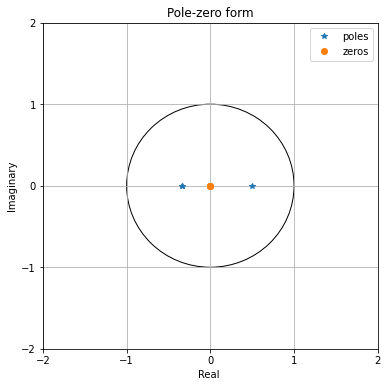

In [148]:
from scipy import signal
w=np.linspace(-5,5,200)
Hz=(18*np.exp(1j*(-2)*w))/((18*np.exp(1j*(-3)*w))+(3*np.exp(1j*(-2)*w))-(4*np.exp(-1j*w))-1)
num=[18,0,0,0]
den=[18 , 3, -4, -1]
z,p,k=scipy.signal.tf2zpk(num,den)                #Determine pole and zero locations

Circle=plt.Circle((0,0),1,fill=False)             #plot unit circle

fig, ax = plt.subplots(figsize=(6,6))

plt.plot(p.real,p.imag,'*',label='poles')         #plot poles   
plt.plot(z.real,z.imag,'o',label='zeros')         #plot zeros
plt.grid()
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.title('Pole-zero form')
plt.xlabel('Real ')
plt.ylabel('Imaginary')
ax.add_patch(Circle)
plt.legend()


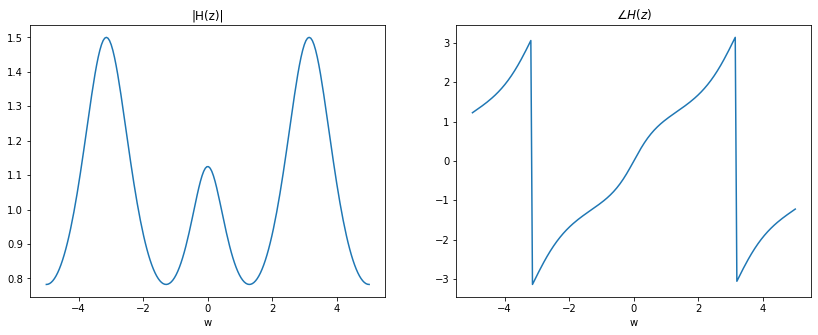

In [60]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('|H(z)|')
plt.xlabel('w')
plt.plot(w,abs(Hz))             #Magnitude Spectra

plt.subplot(1,2,2)
plt.title(r'$ \angle H(z)$')
plt.xlabel('w')
plt.plot(w,np.angle(Hz))         #Phase Spectra

# (b)

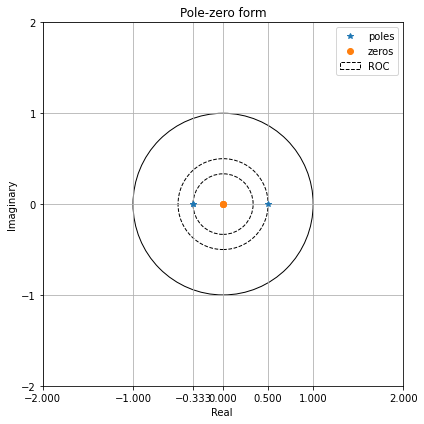

In [52]:
num = [18,0,0,0]
den = [18,3,-4,-1]
r,p,k=scipy.signal.residuez(num,den)
z,p,k=scipy.signal.tf2zpk(num,den)                  #determine pole and zeros location

Circle=plt.Circle((0,0),1,fill=False)
#for ROC
Circle_1=plt.Circle((0,0),p[0],linestyle='--',fill=False,label='ROC')
Circle_2=plt.Circle((0,0),abs(p[1]),linestyle='--',fill=False)
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(p.real,p.imag,'*',label='poles')                   #plot poles
plt.plot(z.real,z.imag,'o',label='zeros')                   #plot zeros
plt.grid()
plt.xticks([-2,-1,0,1,p.real[0],p.real[1],2])
plt.yticks([-2,-1,0,1,2])
plt.title('Pole-zero form')
plt.xlabel('Real ')
plt.ylabel('Imaginary')
ax.add_patch(Circle)
ax.add_patch(Circle_1)
ax.add_patch(Circle_2)
plt.legend()
plt.tight_layout()

# Using partial fraction we get
# H(z)=(0.36z^-1/(1-0.5z^-1))+(0.64z^-1/1+(1/3)z^-1)-0.133z^-2/((1+(1/3)z^-1)^2)
# using Inverse z transform we get,
# (1) for  |z|>1/2,

# h(n)= 0.36(0.5)^n-1 u(n)+ 0.64 (-1/3)^n u(n)- 0.399n (-1/3)^n u(n)
# (2) for  1/3<|z|<1/2,

# h(n)= -0.36(0.5)^n-1 u(-n-1)+ 0.64 (-1/3)^n u(n)- 0.399n (-1/3)^n u(n)
# (3) for |z|<1/3,

# h(n)= -0.36(0.5)^n u(-n-1)+ 0.64 (-1/3)^n u(-n-1) + 0.399n (-1/3)^n u(-n-1)
# where u(n) is unit step sequence

# (9)

One of the uses of the Laplace transform is the solution of differential
equations.
(a) Suppose you are given the ordinary differential equation that represents an LTI system,
y
(2)(t) + 0.5y
(1)(t) + 0.15y(t) = x(t), t ≥ 0 (9)
where y(t) is the output and x(t) is the input of the system, y
(1)(t) and
y
(2)(t) are first and second order derivatives with respect to t. The input
is causal, i.e., x(t) = 0, t < 0. What should be the initial conditions
for the system to be LTI? Find Y (s) for those initial conditions.
(b) If y
(1)(0) = 1 and y(0) = 1 are the initial conditions for the above
ordinary differential equation, find Y (s). If the input to the system is
doubled, i.e., the input is 2x(t), is Y (s) doubled? Is the system linear?
(c) Find the solutions of the ordinary differential equation when the
input is u(t) and 2u(t), with the initial conditions as given above. Compare the solutions and verify your response in (b)

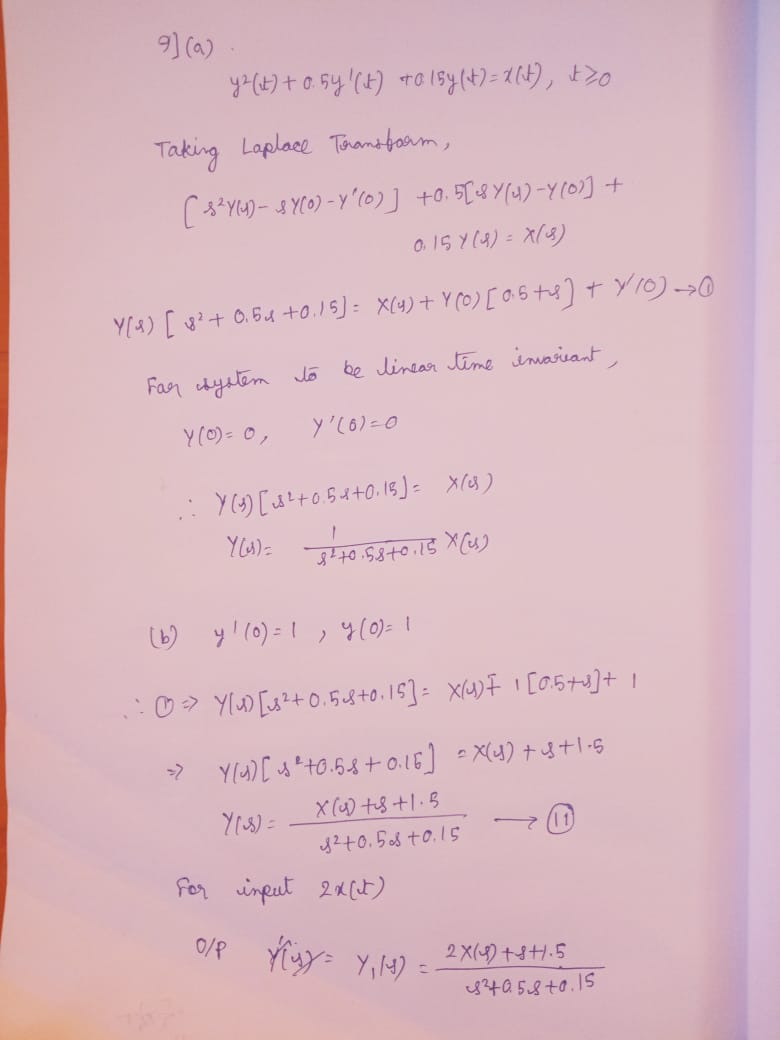

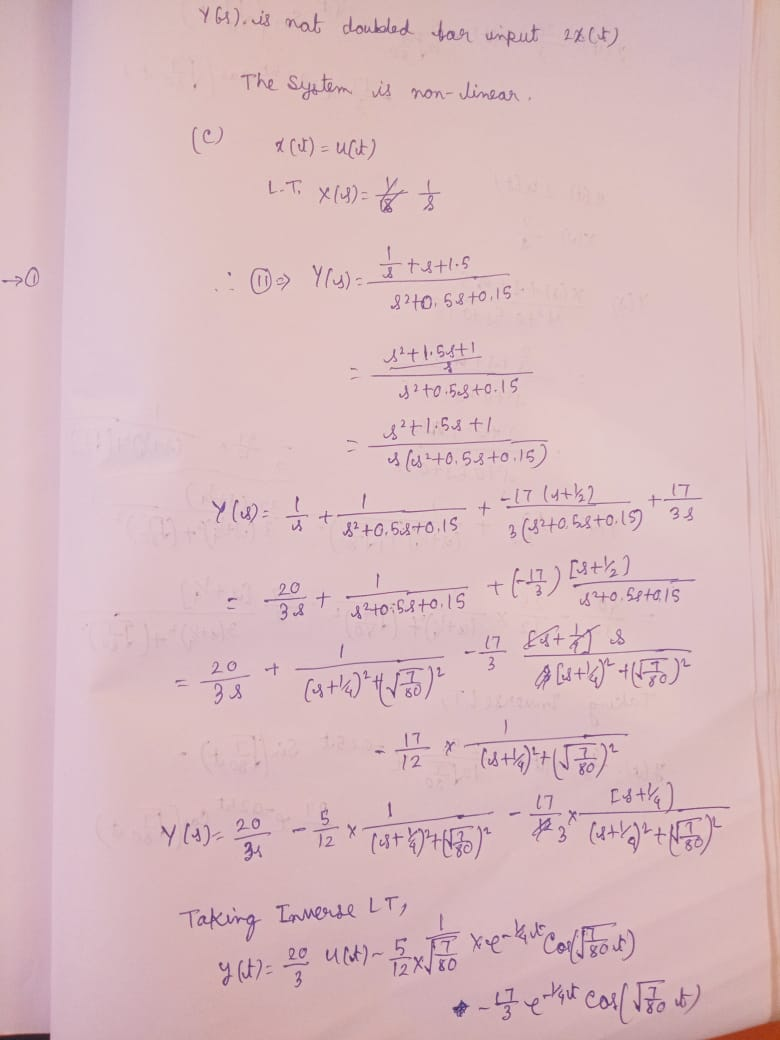

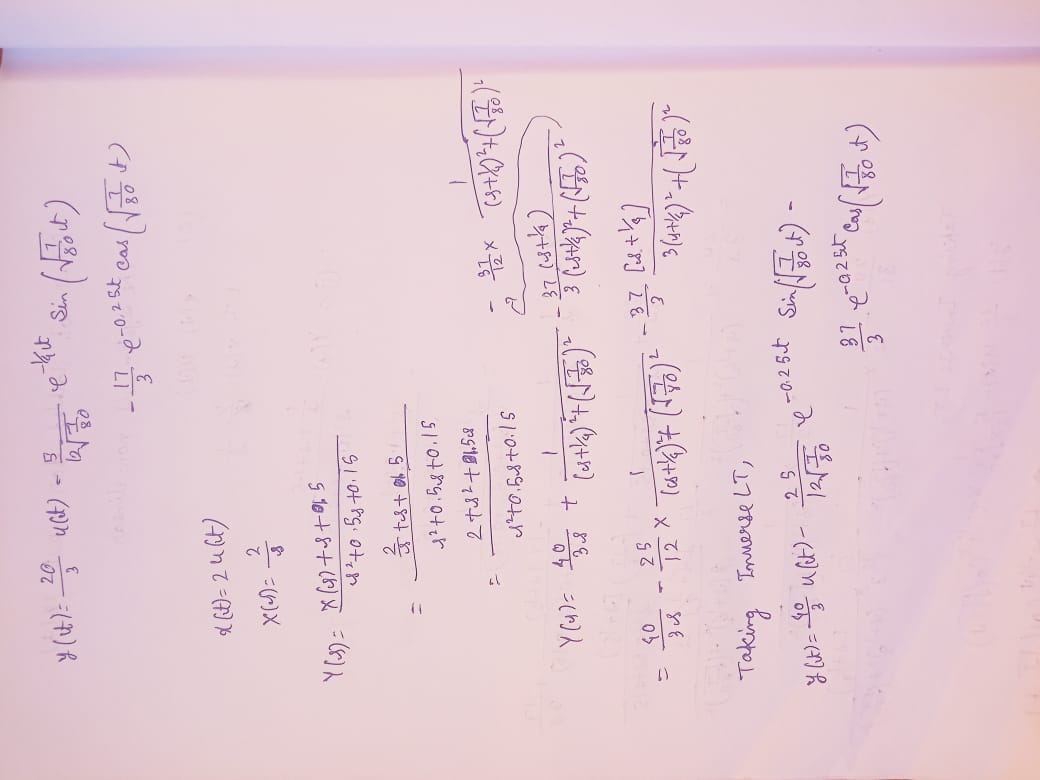

# (10)

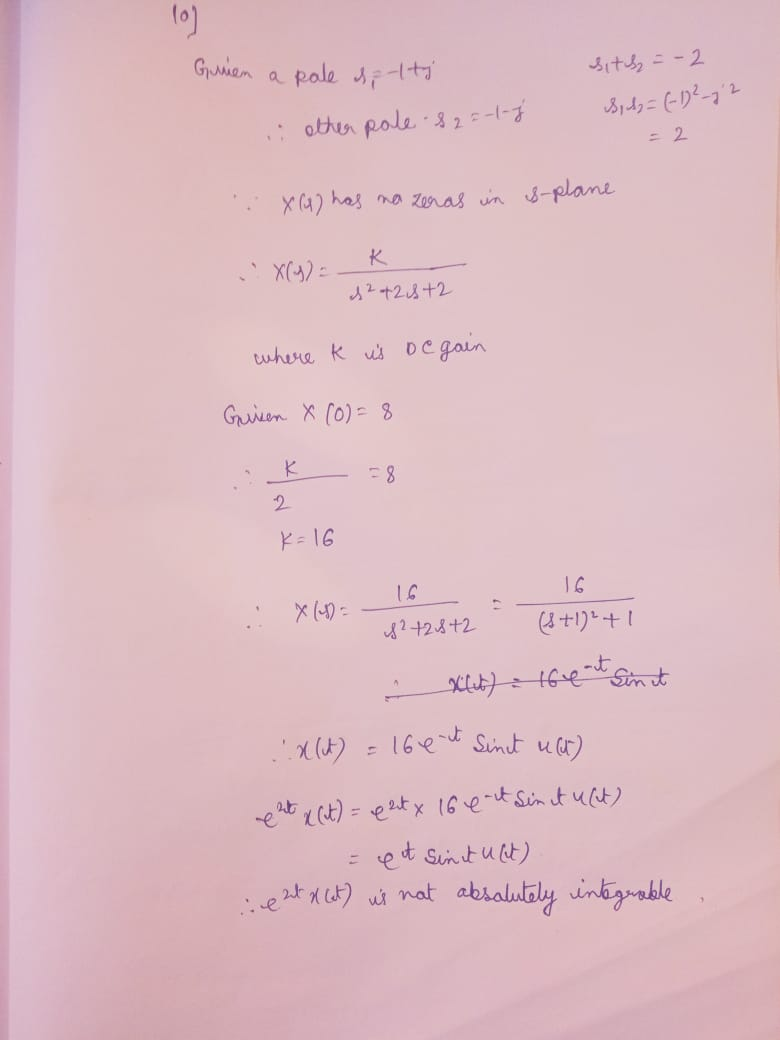

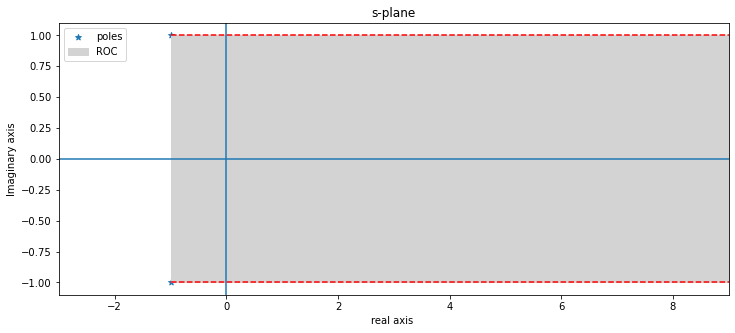

In [69]:
plt.figure(figsize=(12,5))

p=np.array([-1+1j,-1-1j])
p_re=np.real(p)
p_im=np.imag(p)

t=np.arange(-1,10)
y_1=np.ones(11)
plt.title('s-plane')
plt.xlabel('real axis ')
plt.ylabel('Imaginary axis')
plt.scatter(p_re,p_im,marker='*',label='poles')          #plot poles
plt.plot(t,y_1,'r',linestyle='--',)
plt.plot(t,-y_1,'r',ls='--')

#For ROC
plt.fill_between([9,-1],[-1,-1],color='lightgrey',label='ROC')
plt.fill_between([9,-1],[1,1],color='lightgrey')
plt.xlim(-3,9)
plt.axvline()
plt.axhline()
plt.legend()

# ROC: Re(s)>-1